In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [56]:
# dataset 가져오기. boston은 공식적으로 제공되지 않기 때문에 설명에 나온 방법으로 가져온다. 
# column명과 target 열은 예제에 맞게 설정함
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None) # boston 데이터셋 가져오기

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]), columns=columns)
df['TARGET'] = raw_df.values[1::2, 2]

In [58]:
df.tail()
# 데이터의 값의 범위가 다르기 때문에 narmalization을 수행해야함.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [59]:
# value를 Standard Scale을 수행하자. Standard Scaler는 평균이 0 표준편차가 1인 정규분포화 하는 것.

scaler = StandardScaler()
scaler.fit(df.values[:, :-1]) # 전체 raw와 -1 전까지 column에 대해서 진행. 마지막은 Target이니까
# fit은 평균과 sigma를 학습
# 학습이 진행되고 나면 transform으로 적용
df.values[:, :-1] = scaler.transform(df.values[:, :-1]) # 스케일링 적용

In [60]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


## Train Model with Pytorch

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [63]:
data = torch.from_numpy(df.values).float()
data.shape

torch.Size([506, 14])

In [64]:
y = data[:, -1:].cuda() 
x = data[:, :-1].cuda()

print(x.shape, y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [100]:
# figures
n_epochs = 1000000
learning_rate = 1e-2
print_interval = 10000 # 5000마다 학습 진척도 출력

## Build Models


In [101]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(0.1)

In [102]:
# 모델을 만들자
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        
        self.linear1 = nn.Linear(input_dim, 3).cuda() # 단순히 데이터만 cuda로 밀어주는 게 아니라 여기 layer에서도 cuda로 넣어줘야 에러가 안난다.. 
        self.linear2 = nn.Linear(3, 3).cuda()
        self.linear3 = nn.Linear(3, output_dim).cuda()
        self.act = nn.ReLU()
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)
        h = self.act(self.linear1(x)) # |h| = (batch_size, 3)
        h = self.act(self.linear2(h))
        y = self.linear3(h).cuda() # |y| = (batch_dize, output_dim)
        
        return y
        

In [103]:
# 모델 선언
model = MyModel(x.size(-1), y.size(-1))
model

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

## Build Model with LeakyReLU Using nn.Sequential

In [104]:
# 이런 방법도 가능
model  = nn.Sequential(
    nn.Linear(x.size(-1), 3).cuda(),
    nn.LeakyReLU(),
    nn.Linear(3, 3).cuda(),
    nn.LeakyReLU(),
    nn.Linear(3, 3).cuda(), 
    nn.LeakyReLU(),
    nn.Linear(3, 3).cuda(),
    nn.LeakyReLU(),
    nn.Linear(3, 3).cuda(),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)).cuda(),
)
model

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=3, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=3, out_features=1, bias=True)
)

In [105]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [106]:
for i in range(n_epochs):
    y_hat = model(x) # forward
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad() # gradient 초기화
    loss.backward() # backpropagation
    
    optimizer.step() # update parameters
    
    if (i + 1) % print_interval == 0:
        print("Epoch %d : loss=%.4e" %(i+1, loss))

Epoch 10000 : loss=9.2428e+00
Epoch 20000 : loss=9.0571e+00
Epoch 30000 : loss=7.8668e+00
Epoch 40000 : loss=7.8814e+00
Epoch 50000 : loss=7.2122e+00
Epoch 60000 : loss=7.0056e+00
Epoch 70000 : loss=7.0493e+00
Epoch 80000 : loss=6.9364e+00
Epoch 90000 : loss=6.6736e+00
Epoch 100000 : loss=6.9173e+00
Epoch 110000 : loss=6.6157e+00
Epoch 120000 : loss=6.6034e+00
Epoch 130000 : loss=6.9322e+00
Epoch 140000 : loss=6.7383e+00
Epoch 150000 : loss=6.6935e+00
Epoch 160000 : loss=6.7017e+00
Epoch 170000 : loss=6.7789e+00
Epoch 180000 : loss=6.7109e+00
Epoch 190000 : loss=6.8970e+00
Epoch 200000 : loss=6.8033e+00
Epoch 210000 : loss=6.7328e+00
Epoch 220000 : loss=6.6147e+00
Epoch 230000 : loss=6.6005e+00
Epoch 240000 : loss=6.6980e+00
Epoch 250000 : loss=6.7364e+00
Epoch 260000 : loss=6.7369e+00
Epoch 270000 : loss=6.6972e+00
Epoch 280000 : loss=6.5857e+00
Epoch 290000 : loss=6.5718e+00
Epoch 300000 : loss=6.6556e+00
Epoch 310000 : loss=6.6315e+00
Epoch 320000 : loss=6.7169e+00
Epoch 330000 : lo

KeyboardInterrupt: 

C:\Users\kyeul\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


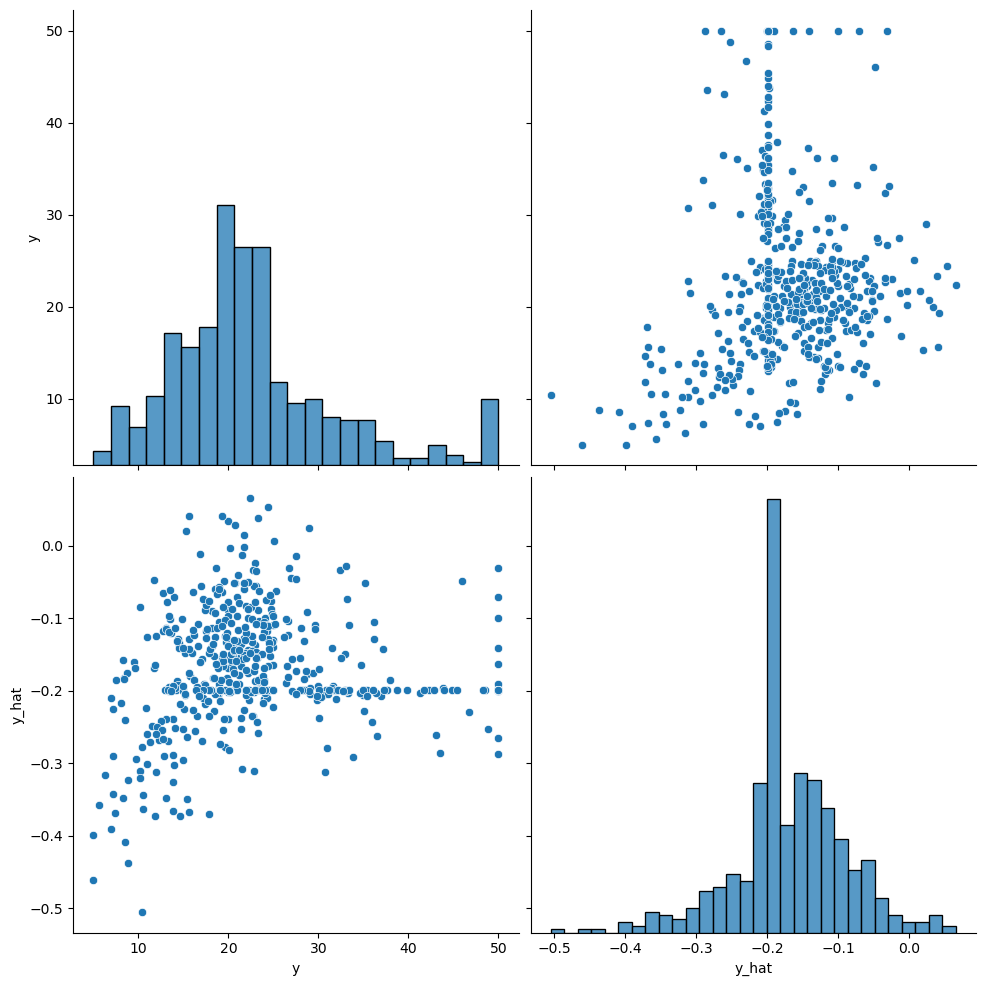

In [90]:
# ReLU 결과 확인
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().cpu().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, size=5)
plt.show()

C:\Users\kyeul\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


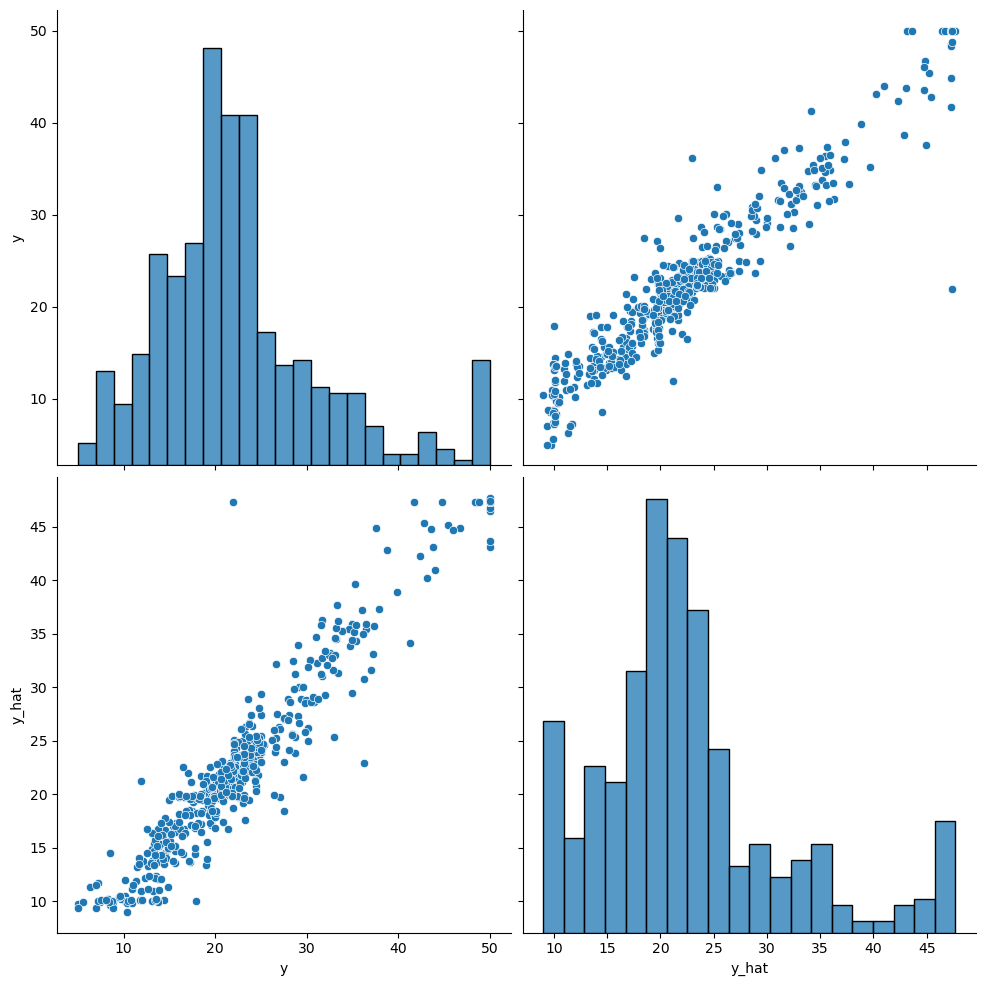

In [97]:
# LeakyReLU 결과 확인
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().cpu().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, size=5)
plt.show()